In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from statsmodels.tsa.arima.model import ARIMA

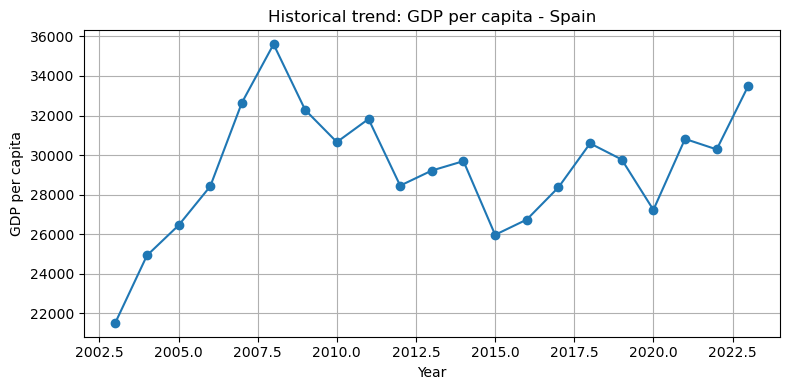

Linear Regression -> MAE: 2,251.73, MSE: 8,862,173.37
Random Forest -> MAE: 596.81, MSE: 579,591.97
ARIMA -> MAE: 2,926.36, MSE: 27,237,476.38


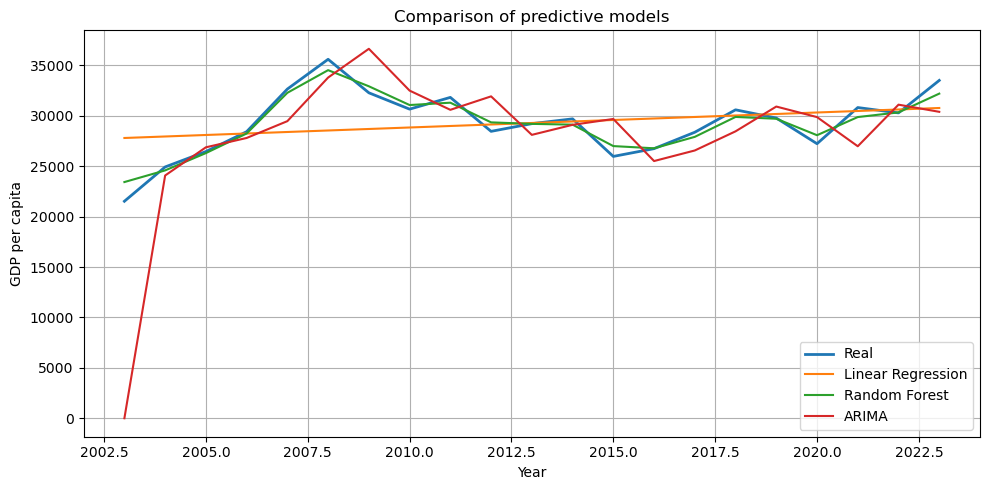

In [2]:

import warnings
warnings.filterwarnings("ignore")

# --------------------------------------
# Load Data
# --------------------------------------

df = pd.read_csv("../data/raw/gdp_per_capita_worldbank.csv")
df = df[df["country"] == "Spain"].dropna(subset=["value"])
df = df.sort_values("date")
df["date"] = pd.to_numeric(df["date"], errors="coerce")

X = df["date"].values.reshape(-1, 1)
y = df["value"].values

# --------------------------------------
# Base visualization
# --------------------------------------
plt.figure(figsize=(8, 4))
plt.plot(df["date"], df["value"], marker="o")
plt.title("Historical trend: GDP per capita - Spain")
plt.xlabel("Year")
plt.ylabel("GDP per capita")
plt.grid(True)
plt.tight_layout()
plt.show()

# --------------------------------------
#  Function to evaluate models
# --------------------------------------
def evaluate_model(model, X, y, label):
    model.fit(X, y)
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    print(f"{label} -> MAE: {mae:,.2f}, MSE: {mse:,.2f}")
    return y_pred

# --------------------------------------
# 1. Linear Regression
# --------------------------------------
lr = LinearRegression()
y_pred_lr = evaluate_model(lr, X, y, "Linear Regression")

# --------------------------------------
# 2. Random Forest Regressor
# --------------------------------------
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
y_pred_rf = evaluate_model(rfr, X, y, "Random Forest")

# --------------------------------------
# 3. ARIMA (statsmodels)
# --------------------------------------
model_arima = ARIMA(y, order=(1, 1, 1))
result_arima = model_arima.fit()
y_pred_arima = result_arima.predict(start=0, end=len(y)-1, typ="levels")
mae_arima = mean_absolute_error(y, y_pred_arima)
mse_arima = mean_squared_error(y, y_pred_arima)
print(f"ARIMA -> MAE: {mae_arima:,.2f}, MSE: {mse_arima:,.2f}")

# --------------------------------------
#  Visual comparison
# --------------------------------------
plt.figure(figsize=(10, 5))
plt.plot(df["date"], y, label="Real", linewidth=2)
plt.plot(df["date"], y_pred_lr, label="Linear Regression")
plt.plot(df["date"], y_pred_rf, label="Random Forest")
plt.plot(df["date"], y_pred_arima, label="ARIMA")
plt.legend()
plt.title("Comparison of predictive models")
plt.xlabel("Year")
plt.ylabel("GDP per capita")
plt.grid(True)
plt.tight_layout()
plt.show()


### 🧠 Interpretation of Predictive Model Results

After comparing three models on the historical GDP per capita time series for Spain (2003–2023):

🏆 **Random Forest Regressor was the most accurate model:**

* Lowest MAE (596.81): on average, it misses the real value by only about $600 USD.
* Much lower MSE compared to the other models, indicating fewer large errors.

📉 **Linear Regression: simple and stable model**
* Higher errors (MAE ≈ 2,250), but the trend is smooth.
* Fails to capture sharp changes or drops (such as the 2008 crisis or COVID).

🔁 **ARIMA: weakest performance in this case**
* Highest MAE and MSE.
* Its strength in capturing seasonal patterns doesn’t help here (the series lacks clear seasonality or strong repetitive cycles).



### 📌 Conclusion

For this indicator and country:
* Random Forest generalizes better and follows the real fluctuations of the data more closely.
* It’s a solid choice for forecasting (as long as enough historical data is available and no major external shocks drastically alter the trend).
